# Introdução

Este projeto tem como objetivo analisar os fatores que influenciam o desempenho acadêmico dos estudantes, medido pela nota em exames finais. Com dados coletados sobre hábitos de estudo, estilo de vida, saúde mental, atividades extracurriculares e uso de redes sociais, buscamos entender quais variáveis apresentam maior correlação com o sucesso escolar. A compreensão desses fatores pode orientar estratégias educacionais e políticas de suporte para melhorar o rendimento dos alunos.


# Importação de Bibliotecas e Configurações Iniciais

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import shap

# Metodologia

A análise foi conduzida com um conjunto de dados contendo variáveis demográficas, comportamentais e de saúde dos estudantes. Inicialmente, realizamos uma análise exploratória para examinar correlações entre as variáveis numéricas e a nota dos exames. Em seguida, agrupamos os estudantes por categorias relevantes, como frequência de exercício, uso diário de redes sociais e trabalho em meio período, para comparar médias de desempenho.

Foi construído um modelo preditivo de regressão linear utilizando variáveis selecionadas com base na correlação e no conhecimento do domínio. O modelo foi avaliado por métricas de qualidade de ajuste, como o coeficiente de determinação (R²) e o erro quadrático médio (RMSE). Por fim, a interpretabilidade do modelo foi aumentada utilizando a técnica SHAP, que permitiu identificar a contribuição individual de cada variável na previsão do desempenho.


# Carregamento e Cópia do Conjunto de Dados

In [2]:
df0 = pd.read_csv("/content/student_habits_performance.csv")
df = df0.copy()

In [3]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


In [8]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

# Mapa de Correlação das Variáveis Numéricas no Desempenho dos Estudantes

<Axes: >

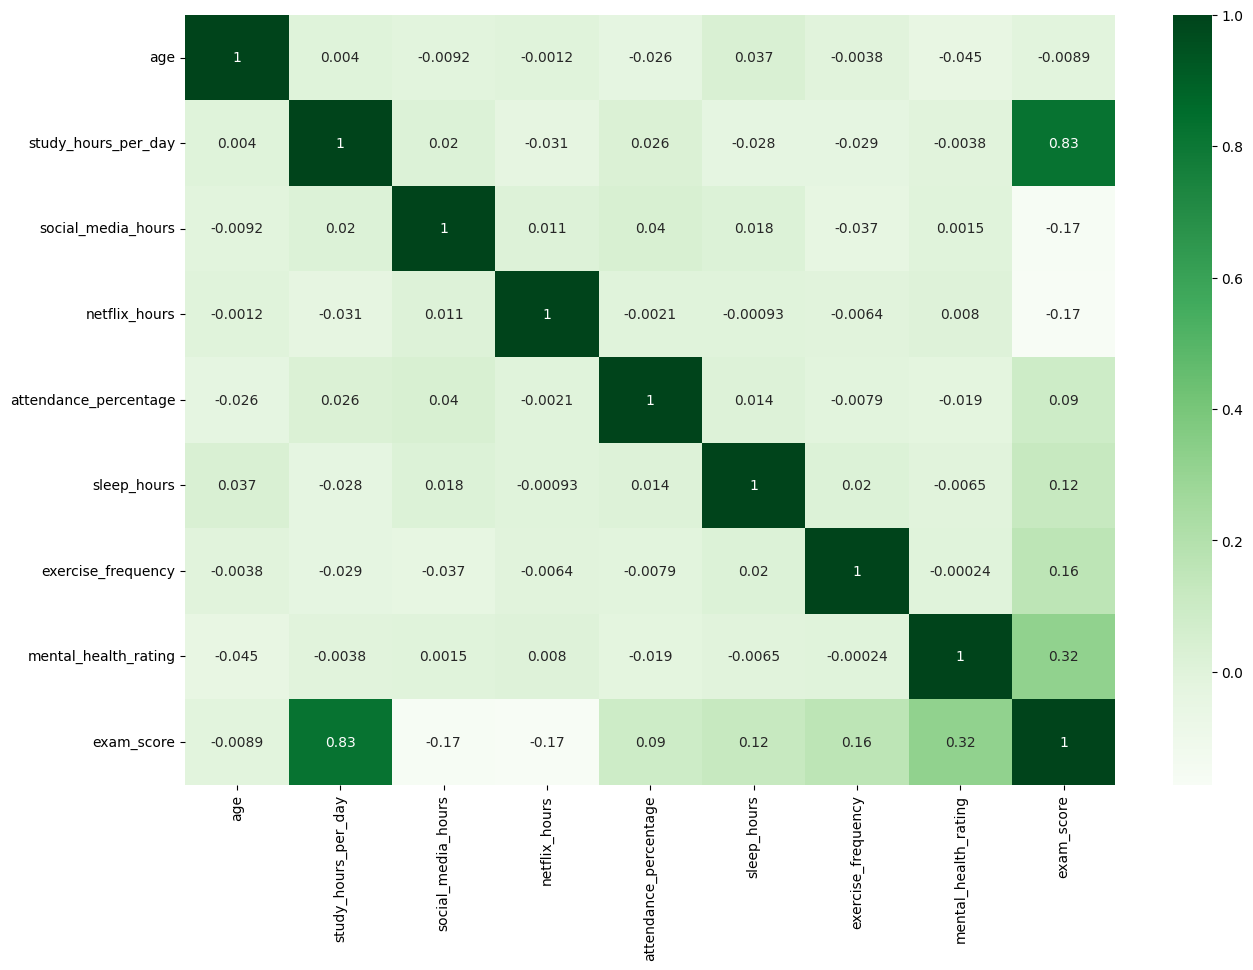

In [5]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Greens')

Observa-se que a nota nos exames apresenta uma forte correlação positiva de 0,83 com o número de horas de estudo por dia (`study_hour_per_day`), indicando que quanto mais tempo os estudantes dedicam aos estudos diariamente, melhor tende a ser seu desempenho nas provas.


Alunos que mais estudos tem a melhor nota?

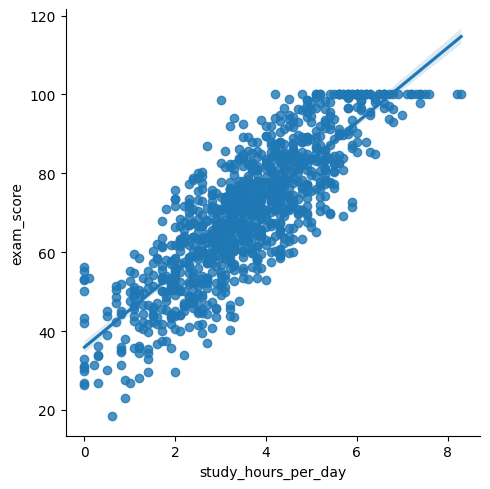

In [13]:
#Grafico de dispersão
sns.lmplot(data=df,x="study_hours_per_day", y="exam_score")

In [16]:
# Criar uma nova coluna categorizando os estudantes pelo tempo de estudo
df['study_group'] = pd.cut(df['study_hours_per_day'],
                           bins=[-float('inf'), 2, 5, float('inf')],
                           labels=['Baixo (<2h)', 'Médio (2-5h)', 'Alto (>5h)'])

# Calcular a média da nota do exame para cada grupo
media_por_grupo = df.groupby('study_group', observed=True)['exam_score'].mean()

print(media_por_grupo)

study_group
Baixo (<2h)     46.973377
Médio (2-5h)    69.890738
Alto (>5h)      90.794194
Name: exam_score, dtype: float64


<Axes: xlabel='social_media_hours', ylabel='Count'>

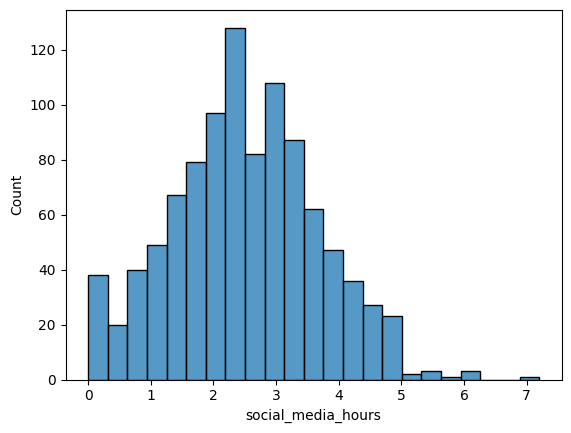

In [21]:
sns.histplot(data=df, x="social_media_hours")

Média das notas por grupo de tempo em redes sociais:
social_media_group
Baixo (0-1h)       73.944643
Moderado (1-3h)    71.026523
Alto (3-5h)        65.702188
Excessivo (>5h)    66.220000
Name: exam_score, dtype: float64


/tmp/ipython-input-22-476313955.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medias_social.index, y=medias_social.values, palette='magma')


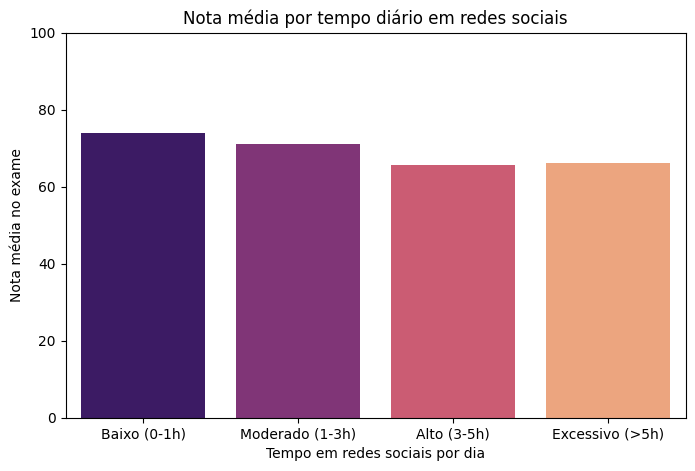

In [22]:
# Criar categorias de uso de redes sociais
df['social_media_group'] = pd.cut(df['social_media_hours'],
                                   bins=[-1, 1, 3, 5, float('inf')],
                                   labels=['Baixo (0-1h)', 'Moderado (1-3h)', 'Alto (3-5h)', 'Excessivo (>5h)'])

# Calcular média das notas por grupo de uso
medias_social = df.groupby('social_media_group', observed=True)['exam_score'].mean()

# Mostrar os valores
print("Média das notas por grupo de tempo em redes sociais:")
print(medias_social)

# Visualizar com gráfico de barras
plt.figure(figsize=(8,5))
sns.barplot(x=medias_social.index, y=medias_social.values, palette='magma')
plt.title('Nota média por tempo diário em redes sociais')
plt.ylabel('Nota média no exame')
plt.xlabel('Tempo em redes sociais por dia')
plt.ylim(0, 100)
plt.show()

#Impacto do Uso das Redes Sociais no Desempenho Acadêmico

Ao agrupar os estudantes de acordo com o tempo médio diário gasto em redes sociais, observou-se uma tendência clara:

- **Baixo uso (0–1h):** nota média de **73,94**
- **Moderado (1–3h):** nota média de **71,03**
- **Alto (3–5h):** nota média de **65,70**
- **Excessivo (>5h):** nota média de **66,22**

Essa análise indica que os estudantes que usam menos redes sociais tendem a obter notas mais altas nos exames. A queda é mais acentuada após 3 horas por dia, sugerindo que o uso prolongado de redes sociais pode estar associado a uma redução no desempenho acadêmico.

/tmp/ipython-input-24-46029522.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[cat], y=df['exam_score'], palette='Set2')


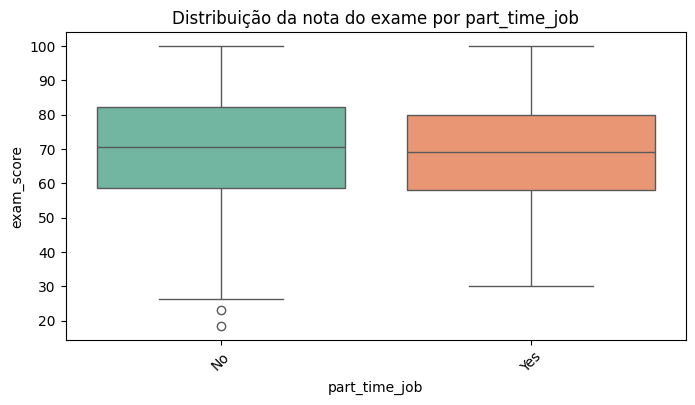

/tmp/ipython-input-24-46029522.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[cat], y=df['exam_score'], palette='Set2')


Média da nota do exame por part_time_job:
part_time_job
No     69.836561
Yes    68.743256
Name: exam_score, dtype: float64




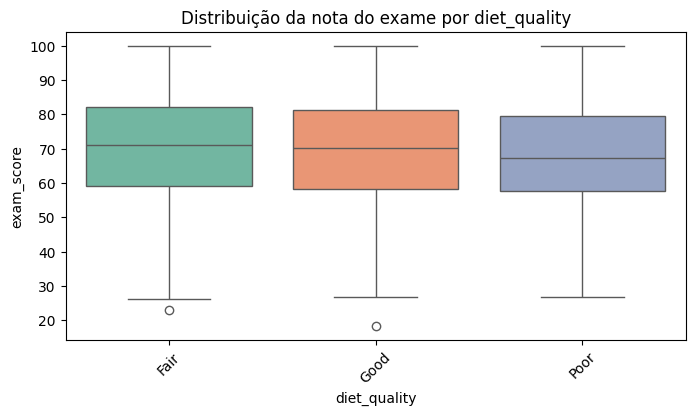

Média da nota do exame por diet_quality:
diet_quality
Fair    70.428833
Good    69.366402
Poor    68.127568
Name: exam_score, dtype: float64




/tmp/ipython-input-24-46029522.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[cat], y=df['exam_score'], palette='Set2')


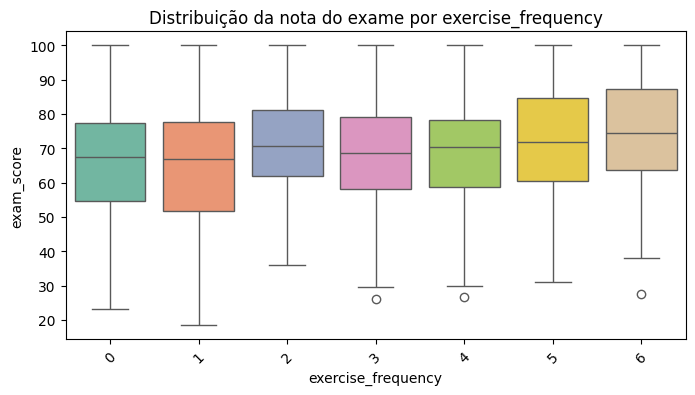

Média da nota do exame por exercise_frequency:
exercise_frequency
0    66.375000
1    65.805479
2    70.459016
3    68.379085
4    68.734328
5    72.706040
6    74.567763
Name: exam_score, dtype: float64




/tmp/ipython-input-24-46029522.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[cat], y=df['exam_score'], palette='Set2')


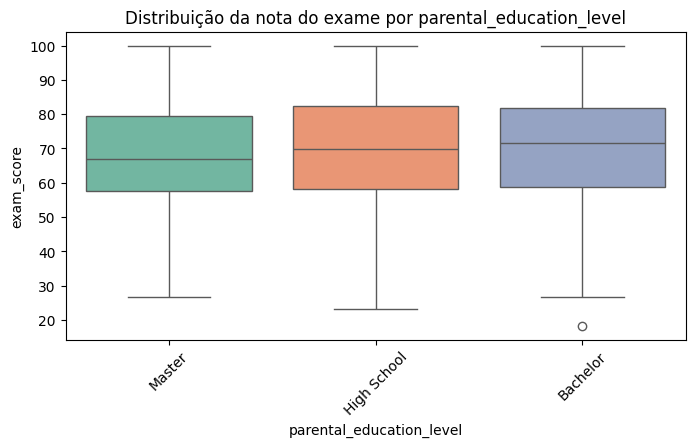

Média da nota do exame por parental_education_level:
parental_education_level
Bachelor       70.272571
High School    69.547194
Master         68.086826
Name: exam_score, dtype: float64




/tmp/ipython-input-24-46029522.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[cat], y=df['exam_score'], palette='Set2')


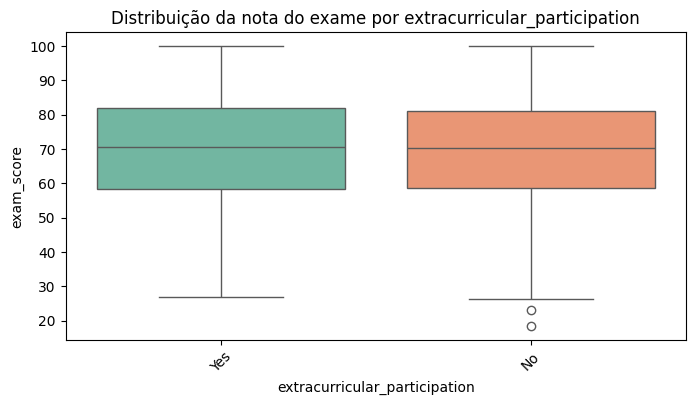

Média da nota do exame por extracurricular_participation:
extracurricular_participation
No     69.591349
Yes    69.623270
Name: exam_score, dtype: float64




In [24]:
# Comparar médias de exam_score para variáveis categóricas

# Variáveis categóricas que vamos analisar
categoricas = ['part_time_job', 'diet_quality', 'exercise_frequency',
               'parental_education_level', 'extracurricular_participation']

for cat in categoricas:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[cat], y=df['exam_score'], palette='Set2')
    plt.title(f'Distribuição da nota do exame por {cat}')
    plt.xticks(rotation=45)
    plt.show()

    medias = df.groupby(cat)['exam_score'].mean()
    print(f"Média da nota do exame por {cat}:")
    print(medias)
    print("\n")

# Comparação do Desempenho Acadêmico com Base em Variáveis Categóricas

A seguir, são analisadas as médias das notas dos exames (`exam_score`) conforme diferentes características dos estudantes:

# Trabalho em meio período (`part_time_job`)
- **Sem trabalho:** média de **69,84**
- **Com trabalho:** média de **68,74**

Estudantes que **não têm trabalho em meio período** apresentaram, em média, desempenho ligeiramente superior. Isso pode indicar que a carga de trabalho extra pode impactar negativamente o tempo de estudo e, consequentemente, o desempenho.

---

# Qualidade da dieta (`diet_quality`)
- **Fair (regular):** **70,43**
- **Good (boa):** **69,37**
- **Poor (ruim):** **68,13**

Observa-se que uma **dieta melhor está associada a melhores notas**. A diferença entre estudantes com dieta “Poor” e “Fair” é de mais de 2 pontos, sugerindo que a alimentação pode ter influência indireta no desempenho (por energia, foco, saúde mental, etc.).

---

# Frequência de exercícios (`exercise_frequency`)
- A média das notas cresce de forma geral conforme a frequência de exercícios aumenta:
  - **0x/semana:** 66,38
  - **2x/semana:** 70,46
  - **5x/semana:** 72,71
  - **6x/semana:** **74,57**

Estudantes que praticam atividades físicas regularmente — especialmente acima de 4x por semana — apresentam **melhores resultados acadêmicos**, o que pode refletir benefícios físicos e mentais.

---

#  Nível educacional dos pais (`parental_education_level`)
- **Bachelor:** 70,27
- **High School:** 69,55
- **Master:** 68,09

Curiosamente, alunos com pais de nível educacional **intermediário (Bachelor)** obtêm maior média de nota. Isso pode indicar que outros fatores, como apoio direto dos pais ou pressão acadêmica, também influenciam.

---

# Participação em atividades extracurriculares (`extracurricular_participation`)
- **Sim:** 69,62
- **Não:** 69,59

A diferença é praticamente nula, sugerindo que a **participação em atividades extracurriculares não está associada diretamente ao desempenho acadêmico** — embora possa trazer outros benefícios não mensurados (soft skills, socialização, etc.).

---


# Conclusões

Com base nas análises realizadas, identificamos os seguintes pontos de atenção:

-  **Estudar mais horas por dia** está fortemente associado a melhores notas. Estudantes que estudam mais de 5h têm desempenho claramente superior.
-  **Redes sociais em excesso (mais de 3h/dia)** estão associadas a quedas expressivas no desempenho acadêmico.
-  **Exercícios físicos frequentes** (5 a 6 vezes por semana) estão ligados a melhores resultados em exames.
-  **Dieta saudável e boa qualidade do sono** também contribuem positivamente para o desempenho.
-  **Trabalho em meio período** e **atividades extracurriculares** não demonstraram impacto direto relevante nas notas, mas podem influenciar outras competências.

> Investir em hábitos saudáveis e em uma rotina equilibrada de estudos é a chave para o sucesso acadêmico.


In [26]:
# Selecionar features relevantes
features_numericas = ['study_hours_per_day', 'attendance_percentage', 'sleep_hours',
                      'social_media_hours', 'netflix_hours', 'mental_health_rating', 'exercise_frequency']

features_categoricas = ['part_time_job', 'diet_quality', 'parental_education_level']


In [27]:
# Separar X e y
X = df[features_numericas + features_categoricas]
y = df['exam_score']

In [28]:
# Dividir treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Pré-processamento para variáveis categóricas
preprocessador = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), features_categoricas)
    ],
    remainder='passthrough'  # Deixa as variáveis numéricas como estão
)

In [30]:
# Pipeline: preprocessamento + modelo
pipeline = Pipeline(steps=[
    ('preprocessamento', preprocessador),
    ('regressor', LinearRegression())
])

In [31]:
# Treinar modelo
pipeline.fit(X_train, y_train)

# Previsão e avaliação
y_pred = pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

R²: 0.8968
RMSE: 5.14


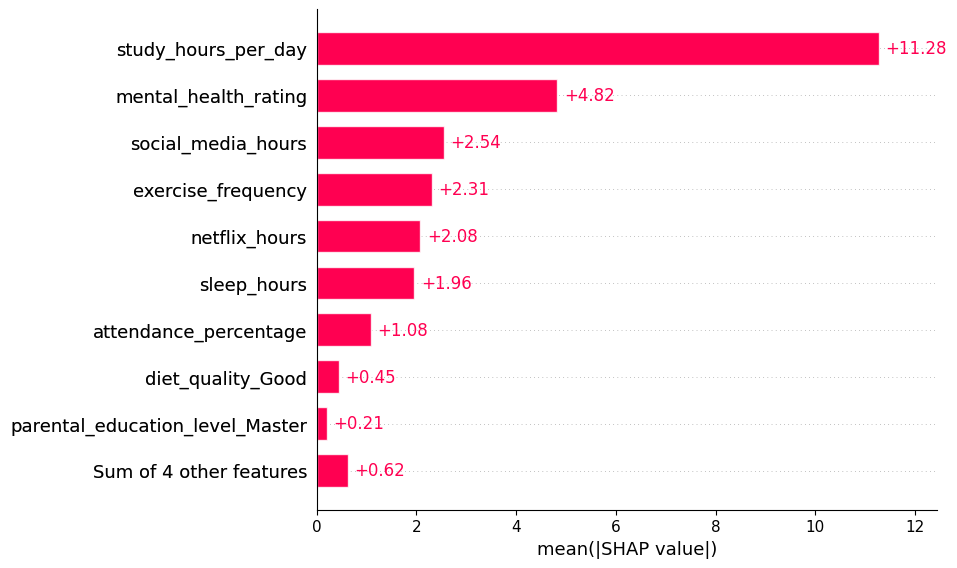

In [36]:
# Aplicar o pré-processador aos dados de treino
X_train_transformed = pipeline.named_steps['preprocessamento'].transform(X_train)

# Recuperar os nomes das colunas após transformação
ohe = pipeline.named_steps['preprocessamento'].named_transformers_['cat']
ohe_features = ohe.get_feature_names_out(features_categoricas)
all_features = list(ohe_features) + features_numericas

# Converter para DataFrame com os nomes das features corretos
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=all_features)

# Criar explicador e calcular SHAP values
explainer = shap.Explainer(pipeline.named_steps['regressor'], X_train_transformed_df)
shap_values = explainer(X_train_transformed_df)

# Plot de importância das variáveis
shap.plots.bar(shap_values, max_display=10)

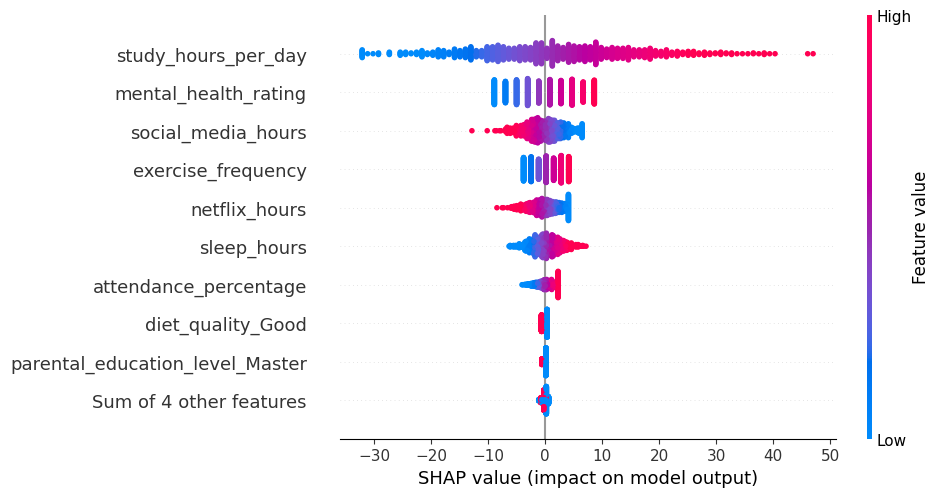

In [38]:
# Visualização detalhada com summary plot
shap.plots.beeswarm(shap_values, max_display=10)

# Interpretação de Algumas Variáveis-Chave e Seus Valores Médios

- **Horas de estudo por dia (`study_hours_per_day`) — 11,28 horas:**  
  Esse valor indica que, em média, os estudantes estudam bastante por dia, o que está muito acima da média usual para estudantes universitários ou escolares. Essa alta dedicação pode explicar parte do desempenho elevado observado nas notas, já que existe uma forte correlação positiva entre horas de estudo e desempenho acadêmico.

- **Avaliação da saúde mental (`mental_health_rating`) — 4,82 (escala presumida):**  
  Um valor médio de 4,82 sugere que a saúde mental dos estudantes está em uma faixa intermediária. Como a saúde mental pode influenciar a concentração, motivação e o bem-estar geral, manter ou melhorar essa média é importante para sustentar o desempenho acadêmico.

- **Horas em redes sociais (`social_media_hours`) — 2,54 horas:**  
  Em média, os estudantes passam cerca de 2,5 horas por dia nas redes sociais, um valor que se enquadra na categoria “moderado”. Análises anteriores indicam que o uso moderado de redes sociais tende a estar associado a uma redução leve no desempenho comparado ao uso baixo, mas que o impacto mais forte ocorre em uso alto ou excessivo.

---

**Resumo:** Esses valores médios indicam que os estudantes da amostra dedicam bastante tempo aos estudos, têm saúde mental razoável e um uso moderado de redes sociais, o que pode estar alinhado com o desempenho geral observado nas notas.


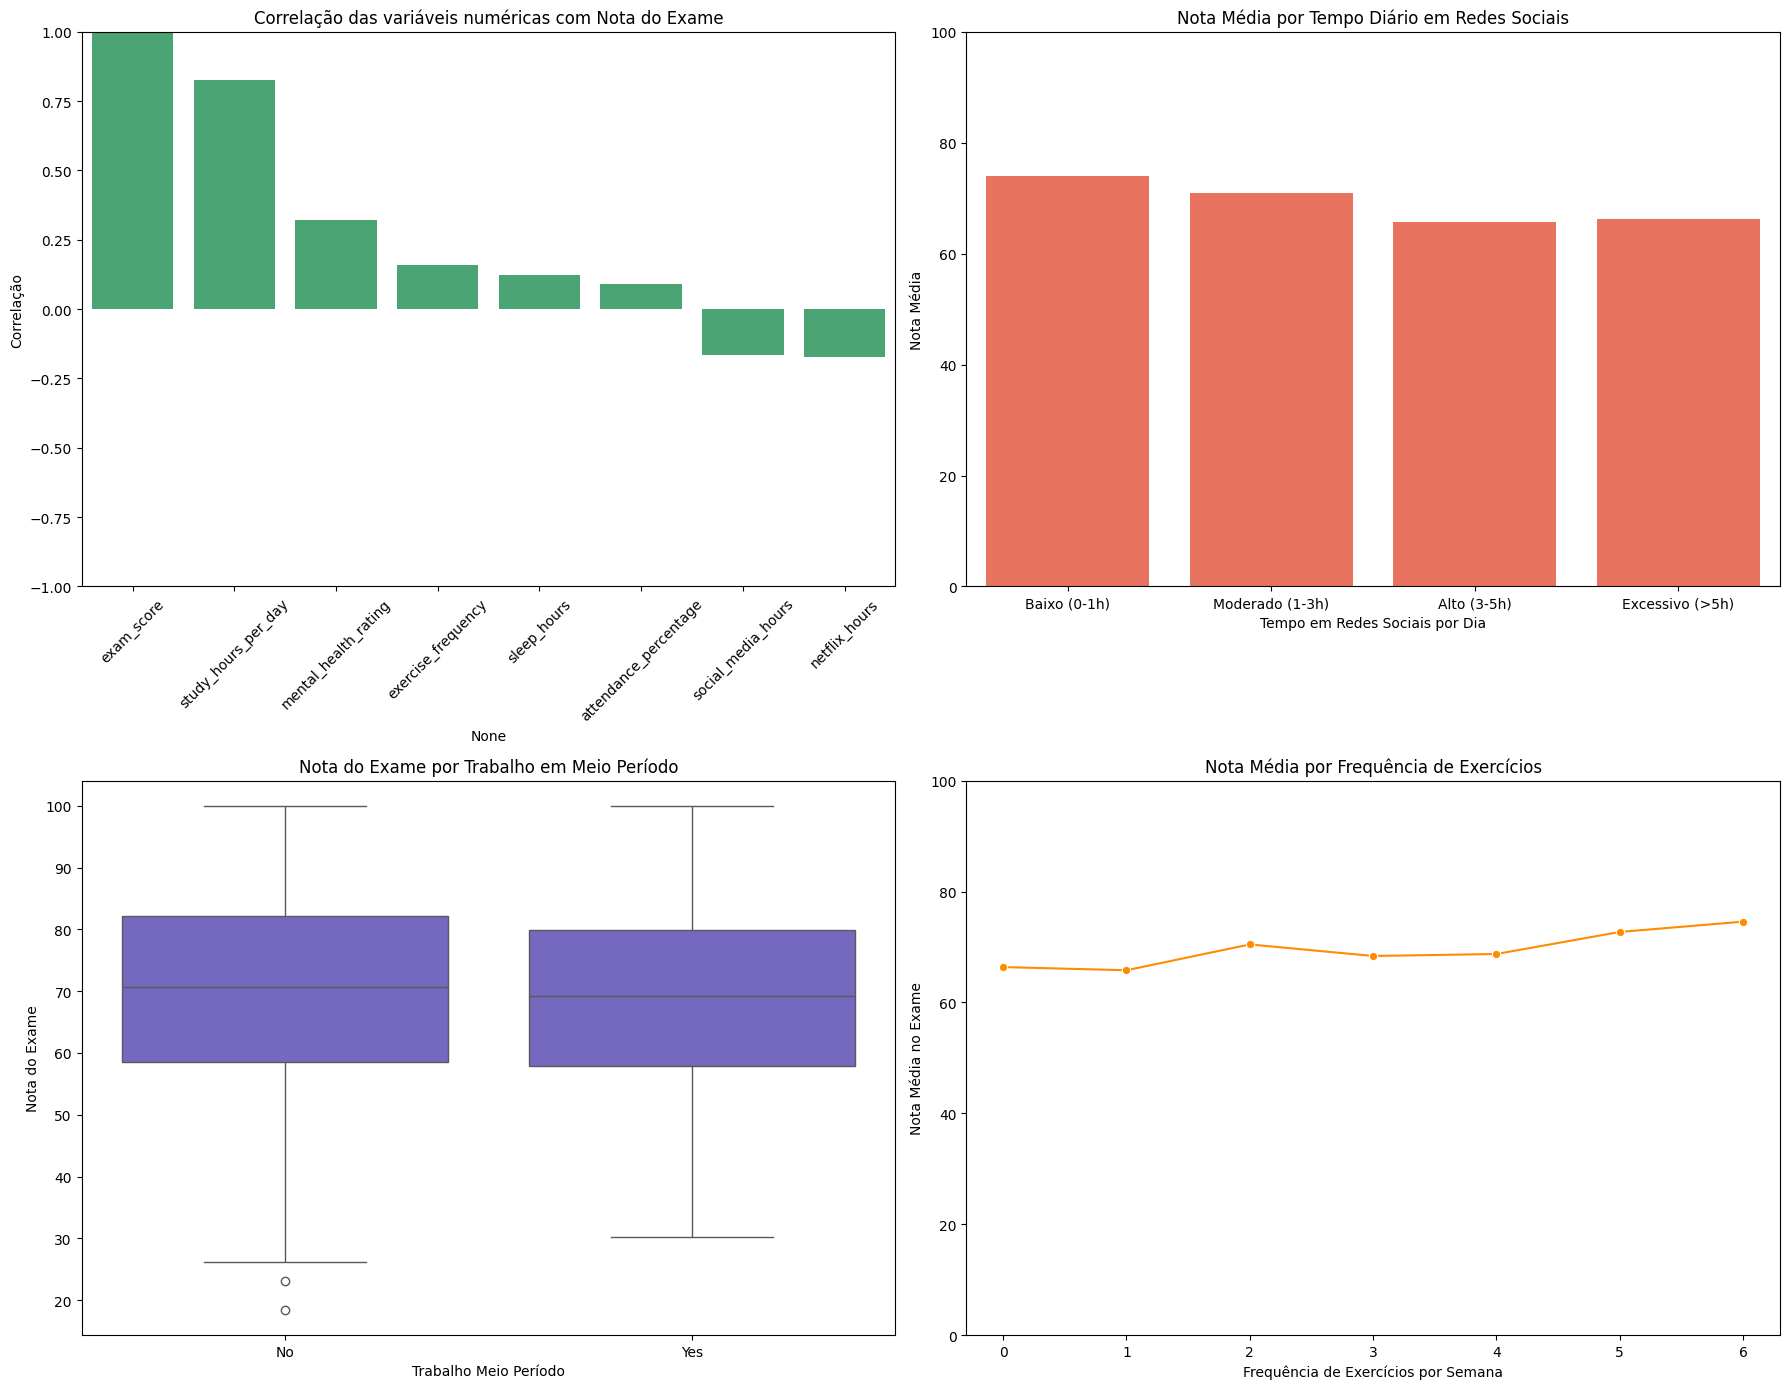

In [40]:
plt.figure(figsize=(18, 14))

# 1. Correlação das variáveis numéricas com a nota do exame
plt.subplot(2, 2, 1)
numericas = ['study_hours_per_day', 'social_media_hours', 'netflix_hours',
             'attendance_percentage', 'sleep_hours', 'mental_health_rating', 'exercise_frequency']
corrs = df[numericas + ['exam_score']].corr()['exam_score'].sort_values(ascending=False)
sns.barplot(x=corrs.index, y=corrs.values, color='mediumseagreen')
plt.title('Correlação das variáveis numéricas com Nota do Exame')
plt.xticks(rotation=45)
plt.ylabel('Correlação')
plt.ylim(-1, 1)

# 2. Nota média por grupos de tempo em redes sociais
plt.subplot(2, 2, 2)
df['social_media_group'] = pd.cut(df['social_media_hours'],
                                   bins=[-1, 1, 3, 5, float('inf')],
                                   labels=['Baixo (0-1h)', 'Moderado (1-3h)', 'Alto (3-5h)', 'Excessivo (>5h)'])
medias_social = df.groupby('social_media_group', observed=True)['exam_score'].mean()
sns.barplot(x=medias_social.index, y=medias_social.values, color='tomato')
plt.title('Nota Média por Tempo Diário em Redes Sociais')
plt.ylabel('Nota Média')
plt.xlabel('Tempo em Redes Sociais por Dia')
plt.ylim(0, 100)

# 3. Distribuição da nota do exame por trabalho em meio período
plt.subplot(2, 2, 3)
sns.boxplot(x=df['part_time_job'], y=df['exam_score'], color='slateblue')
plt.title('Nota do Exame por Trabalho em Meio Período')
plt.xlabel('Trabalho Meio Período')
plt.ylabel('Nota do Exame')

# 4. Nota média por frequência de exercícios
plt.subplot(2, 2, 4)
medias_exercicios = df.groupby('exercise_frequency', observed=True)['exam_score'].mean()
sns.lineplot(x=medias_exercicios.index, y=medias_exercicios.values, marker='o', color='darkorange')
plt.title('Nota Média por Frequência de Exercícios')
plt.xlabel('Frequência de Exercícios por Semana')
plt.ylabel('Nota Média no Exame')
plt.ylim(0, 100)

plt.tight_layout()
plt.show()


# Conclusão

A análise revelou que o principal fator associado ao desempenho acadêmico é o tempo dedicado aos estudos, com uma forte correlação positiva entre horas de estudo diárias e notas dos exames. Além disso, hábitos saudáveis, como prática regular de exercícios físicos e boa qualidade de sono e dieta, também mostraram impacto positivo no rendimento escolar.

Por outro lado, o uso excessivo de redes sociais foi associado a uma redução significativa nas notas, evidenciando a importância do equilíbrio entre estudo e lazer digital. Variáveis como trabalho em meio período e participação em atividades extracurriculares apresentaram impacto menor sobre as notas, sugerindo que seus efeitos podem estar mais ligados a outros aspectos do desenvolvimento pessoal.

Os resultados obtidos podem ser utilizados para orientar estudantes e educadores a adotarem práticas que promovam a melhora do desempenho acadêmico e bem-estar geral, além de fundamentar políticas educacionais baseadas em dados.
